# Home Loan Prediction
Problem Statement:-To predict Loan Status(Yes/No) for home loan depending on the features given in the dataset.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
data=pd.read_csv("C:/Recent Download/Train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.shape

(614, 13)

# Data Cleaning


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There missing values in the dataset.

In [6]:
#Filling missing values for numerical features
mean=data['LoanAmount'].mean()
data['LoanAmount'].fillna(mean,inplace=True)
mean=data['Loan_Amount_Term'].mean()
data['Loan_Amount_Term'].fillna(mean,inplace=True)
mean=data['Credit_History'].mean()
data['Credit_History'].fillna(mean,inplace=True)

In [7]:
#Filling Missing values for categorical features
mode=data['Gender'].mode()[0]
data['Gender']=data['Gender'].fillna(mode)
mode=data['Married'].mode()[0]
data['Married']=data['Married'].fillna(mode)
mode=data['Dependents'].mode()[0]
data['Dependents']=data['Dependents'].fillna(mode)
mode=data['Self_Employed'].mode()[0]
data['Self_Employed']=data['Self_Employed'].fillna(mode)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So now there are no missing values in the dataset.

# Data Visualization

<AxesSubplot:>

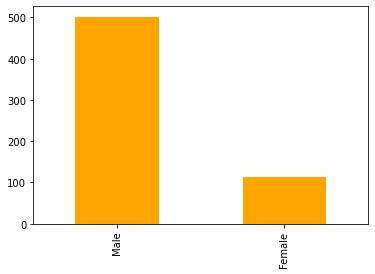

In [9]:
#Value count for gender
data['Gender'].value_counts().plot(kind='bar',color='orange')

There are 75% males and 25% females.

<AxesSubplot:>

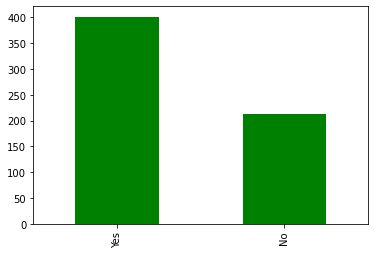

In [10]:
#Value count for Married
data['Married'].value_counts().plot(kind='bar',color='green')

Around 65% peoples are married and rest 35% are unmarried

<AxesSubplot:ylabel='Education'>

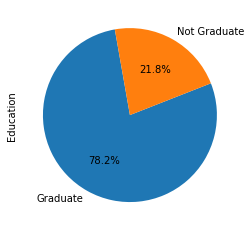

In [11]:
#Value count for Education 
data['Education'].value_counts().plot(kind='pie',startangle=100,autopct='%1.1f%%')

About 78.2% peoples are graduate and 21.8% peoples are not graduate.

<AxesSubplot:ylabel='Self_Employed'>

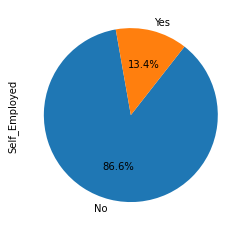

In [12]:
#Value count for Self_Employed
data['Self_Employed'].value_counts().plot(kind='pie',startangle=100,autopct='%1.1f%%')

86% Peoples are not SelfEmployed.

<AxesSubplot:ylabel='Property_Area'>

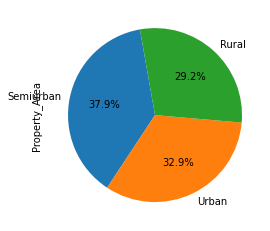

In [13]:
#Value count for Property_Area
data['Property_Area'].value_counts().plot(kind='pie',startangle=100,autopct='%1.1f%%')

38% = Semi urban area
33%=Urban Area
29%=Rural Area

<AxesSubplot:>

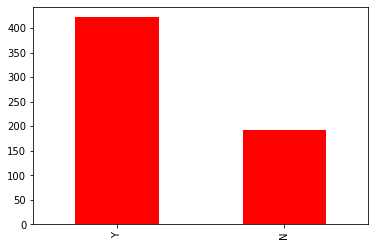

In [14]:
#Value count for Loan_Status
data['Loan_Status'].value_counts().plot(kind='bar',color='red')

Most of the peoples loan status is approved(yes).

In [15]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Data Processing

In [16]:
# let's encode the Loan_Status to numerical values
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(0,1))

In [17]:
# let's encode the Gender to numerical values
data['Gender']=data['Gender'].replace(('Female','Male'),(0,1))

In [18]:
# let's encode the Married to numerical values
data['Married']=data['Married'].replace(('Yes','No'),(0,1))

In [19]:
# let's encode the Dependents to numerical values
data['Dependents']=data['Dependents'].replace(('0','1','2','3+'),(0,1,2,3))

In [20]:
# let's encode the Education to numerical values
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(0,1))

In [21]:
# let's encode the Self_Employed  to numerical values
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'),(0,1))

In [22]:
# let's encode the 'Property_Area to numerical values
data['Property_Area'] = data['Property_Area'].replace(('Semiurban','Urban','Rural'),(0,1,2))

<AxesSubplot:>

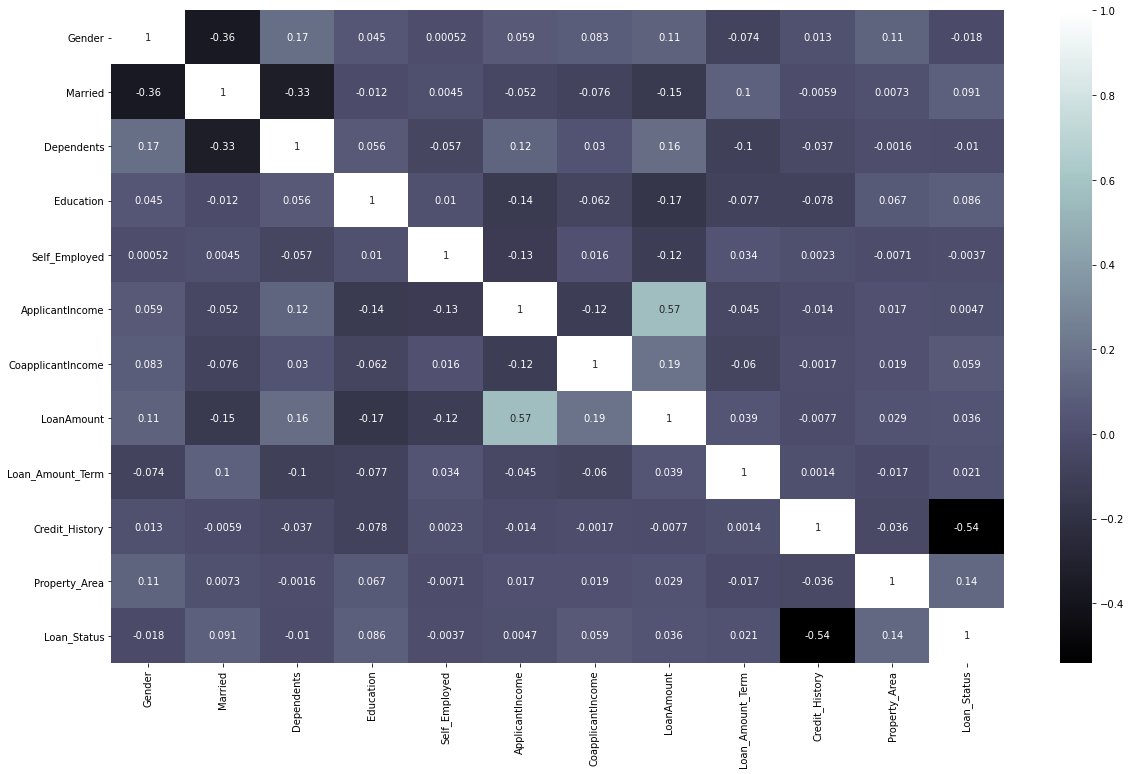

In [23]:
#Correlation
corr=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,cmap='bone',annot=True)


In [24]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [25]:
x=data.drop('Loan_Status',axis=1)
y=data.Loan_Status

In [26]:
x.shape

(614, 11)

In [27]:
y.shape

(614,)

In [28]:
#Outliers
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=22,contamination=0.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=22)

In [29]:
y_pred_outlier=clf.predict(data)

In [30]:
y_pred_outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

# Feature Engineering

[0.02324271 0.0198319  0.0601634  0.02185236 0.02220584 0.17062106
 0.11485354 0.17317015 0.05123146 0.29797712 0.04485047]


<AxesSubplot:>

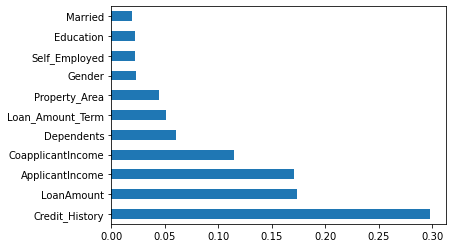

In [31]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(11).plot(kind='barh')


In [32]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Spliting data


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [34]:
x_train.shape

(491, 11)

In [35]:
y_train.shape

(491,)

# MODEL BUILDING

In [36]:
log=pd.DataFrame(columns=["Model", "Accuracy"])

Training Accuracy:  0.9918533604887984
Testing Accuarcy:  0.7642276422764228
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        84
           1       0.68      0.49      0.57        39

    accuracy                           0.76       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123



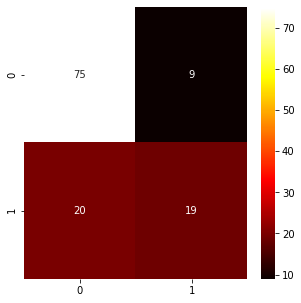

In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix               

model = RandomForestClassifier(n_estimators =20, random_state = 22)
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'hot')
plt.show()


In [38]:
log =log.append({"Model": " Random Forest", "Accuracy":  model.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.6945010183299389
Testing Accuarcy:  0.6829268292682927
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        84
           1       0.68      0.49      0.57        39

    accuracy                           0.76       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123



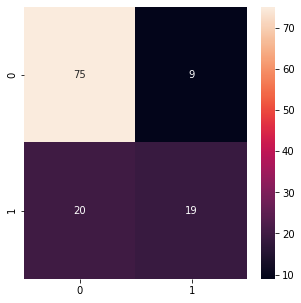

In [39]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model1 = SVC(kernel="rbf",C=1)
model1.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)
print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'rocket')
plt.show()


In [40]:
log =log.append({"Model": " SVC", "Accuracy":  model1.score(x_test, y_test)}, ignore_index=True)


Training Accuracy:  0.814663951120163
Testing Accuarcy:  0.8211382113821138
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        84
           1       1.00      0.44      0.61        39

    accuracy                           0.82       123
   macro avg       0.90      0.72      0.75       123
weighted avg       0.86      0.82      0.80       123



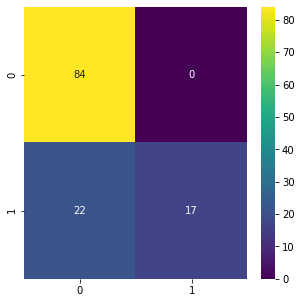

In [41]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model2 =DecisionTreeClassifier(criterion='gini',max_depth=3)
model2.fit(x_train, y_train)
y_pred_rf = model2.predict(x_test)
print("Training Accuracy: ", model2.score(x_train, y_train))
print('Testing Accuarcy: ', model2.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'viridis')
plt.show()

In [42]:
log =log.append({"Model": "DECISION TREE", "Accuracy":  model2.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.7311608961303462
Testing Accuarcy:  0.6747967479674797
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        84
           1       0.44      0.10      0.17        39

    accuracy                           0.67       123
   macro avg       0.57      0.52      0.48       123
weighted avg       0.61      0.67      0.60       123



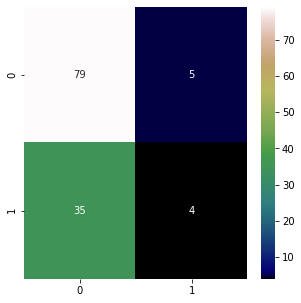

In [43]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model3 =KNeighborsClassifier(n_neighbors=4)
model3.fit(x_train, y_train)
y_pred_rf = model3.predict(x_test)
print("Training Accuracy: ", model3.score(x_train, y_train))
print('Testing Accuarcy: ', model3.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'gist_earth')
plt.show()

Training Accuracy:  0.8187372708757638
Testing Accuarcy:  0.8130081300813008
              precision    recall  f1-score   support

           0       0.80      0.96      0.88        84
           1       0.86      0.49      0.62        39

    accuracy                           0.81       123
   macro avg       0.83      0.73      0.75       123
weighted avg       0.82      0.81      0.80       123



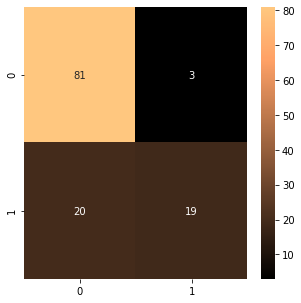

In [44]:
#ADA BOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model4 =AdaBoostClassifier(n_estimators=10,random_state=22)
model4.fit(x_train, y_train)
y_pred_rf = model4.predict(x_test)
print("Training Accuracy: ", model4.score(x_train, y_train))
print('Testing Accuarcy: ', model4.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()


In [45]:
log =log.append({"Model": "KNN", "Accuracy": model3.score(x_test, y_test)}, ignore_index=True)


In [46]:
log =log.append({"Model": "Adaboost", "Accuracy":  model4.score(x_test, y_test)}, ignore_index=True)


[18:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.8411405295315683
Testing Accuarcy:  0.8048780487804879
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        84
           1       0.80      0.51      0.62        39

    accuracy                           0.80       123
   macro avg       0.80      0.73      0.75       123
weighted avg       0.80      0.80      0.79       123



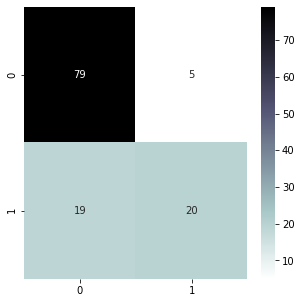

In [47]:
#XGBM
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model6 =xgb.XGBClassifier(random_state=22,learning_rate=0.01)
model6.fit(x_train, y_train)
y_pred_rf = model6.predict(x_test)
print("Training Accuracy: ", model6.score(x_train, y_train))
print('Testing Accuarcy: ', model6.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'bone_r')
plt.show()

In [48]:
log =log.append({"Model": "XGBM", "Accuracy":  model6.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.8105906313645621
Testing Accuarcy:  0.8211382113821138
              precision    recall  f1-score   support

           0       0.80      0.99      0.88        84
           1       0.95      0.46      0.62        39

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.82      0.80       123



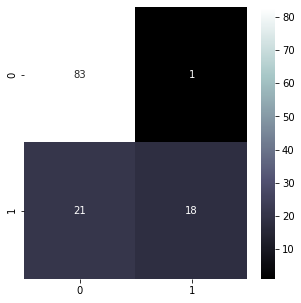

In [49]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model7 =LogisticRegression(max_iter=400)
model7.fit(x_train, y_train)
y_pred_rf = model7.predict(x_test)
print("Training Accuracy: ", model7.score(x_train, y_train))
print('Testing Accuarcy: ', model7.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'bone')
plt.show()


In [50]:
log =log.append({"Model": "Logistic Regression", "Accuracy":  model7.score(x_test, y_test)}, ignore_index=True)


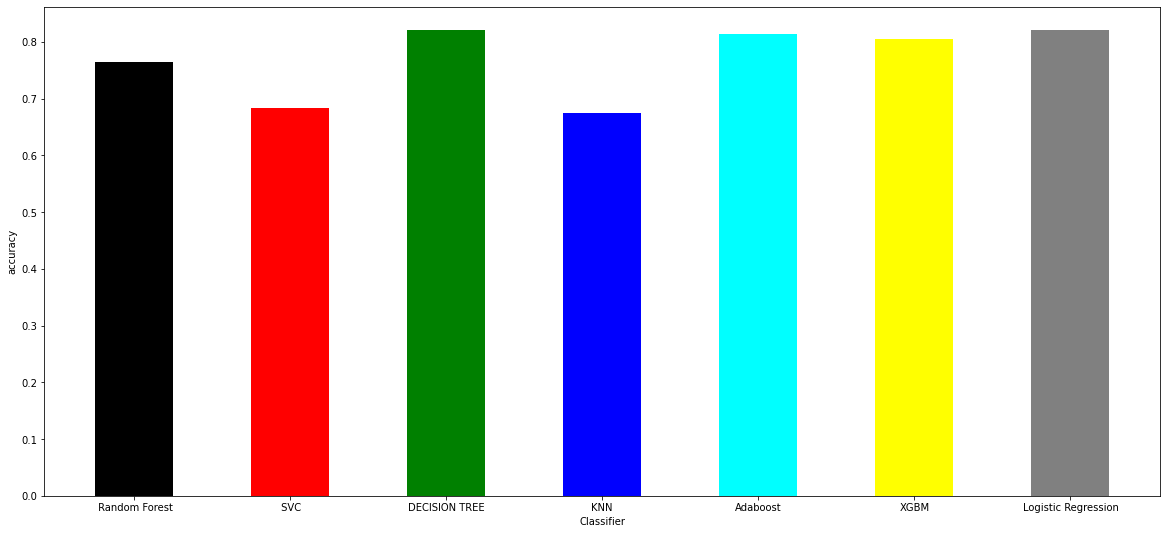

In [51]:
plt.figure(figsize=(20, 9))
plt.bar(log["Model"], log["Accuracy"], width=0.5,color=['black', 'red', 'green', 'blue', 'cyan','yellow','grey','pink'])
plt.xlabel("Classifier")
plt.ylabel("accuracy")
plt.show()


In [52]:
log


,Model,Accuracy
0,Random Forest,0.764228
1,SVC,0.682927
2,DECISION TREE,0.821138
3,KNN,0.674797
4,Adaboost,0.813008
5,XGBM,0.804878
6,Logistic Regression,0.821138
